In [0]:
%pip install torch lxml

  Using cached torch-2.6.0-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached lxml-5.3.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.7 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2025.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux20

In [0]:
!pip install dask distributed

  Using cached dask-2025.2.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached distributed-2025.2.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached partd-1.4.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached locket-1.0.0-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached msgpack-1.1.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached tblib-3.0.0-py3-none-any.whl.metadata (25 kB)
  Using cached zict-3.0.0-py2.py3-none-any.whl.metadata (899 bytes)
Using cached dask-2025.2.0-py3-none-any.whl (1.4 MB)
Using cached distributed-2025.2.0-py3-none-any.whl (1.0 MB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached locket-1.0.0-py2.py3-none-any.whl (4.4 kB)
Using cached msgpack-1.1.0-cp312-cp312-manylinux_2_17_x86_64.manylinux

In [0]:
%pip uninstall typing_extensions typeguard omnipath -y
%pip install typing_extensions==4.5.0
dbutils.library.restartPython()
%pip install anndata omnipath decoupler tqdm gseapy

Found existing installation: typing_extensions 4.11.0
Not uninstalling typing-extensions at /databricks/python3/lib/python3.12/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea
Can't uninstall 'typing_extensions'. No files were found to uninstall.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.11.0
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.12/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea
    Can't uninstall 'typing_extensions'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="Exception ignored on calling ctypes callback function")

In [0]:
import decoupler as dc
import omnipath
import gseapy as gp
from gseapy import Msigdb

from typing import Mapping
import dask.array as da
from dask.distributed import Client

from numba import config
config.THREADING_LAYER = 'workqueue'

import pyarrow.parquet as pq
import random
import numpy as np
import pandas as pd
import torch
import tqdm
import os
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
SEED = 42
global_rng = np.random.default_rng(SEED)

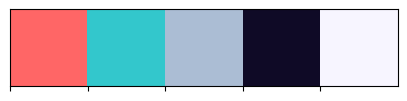

In [0]:
# Turbine colors
import seaborn as sns
colors = ['#FF6666', '#33C7CC', '#abbdd4', '#0F0A26', '#F7F5FF']
sns.set_palette(sns.color_palette(colors))
sns.palplot(sns.color_palette(colors))

## Load embeddings

In [0]:
scgpt = pq.read_table(...).to_pandas()

scfound = pq.read_table(...).to_pandas()

scelmo = pq.read_table(...).to_pandas()

go = pd.read_csv(..., index_col=0)

print(
    "Embedding shapes:\n"
    f"  scgpt  : {scgpt.shape}\n"
    f"  scfound: {scfound.shape}\n"
    f"  scelmo : {scelmo.shape}\n"
    f"  go     : {go.shape}"
)

Embedding shapes:
  scgpt  : (60728, 512)
  scfound: (19305, 768)
  scelmo : (41283, 1536)
  go     : (16855, 7749)


In [0]:
common_genes = set(scgpt.index).intersection(scfound.index).intersection(scelmo.index).intersection(go.index)
len(common_genes)

16239

In [0]:
all_embeddings = {}

dataframes = [ scfound, scgpt, scelmo, go]
embedding_names = ['scfound', 'scgpt', 'scelmo', 'go']

for df, name in zip(dataframes, embedding_names):
    gene_embeddings = {gene: df.loc[gene].values for gene in df.index}
    all_embeddings[name] = gene_embeddings

for embedding in all_embeddings.values():
    common_genes.intersection_update(embedding.keys())

## Pathway genes

In [0]:
def get_gene_sets(db_name='Reactome_2022', organism='Human', split_complexes=False):
    """
    Function to extract the pathway gene sets from a database
    """

    # If 'collectri'
    if db_name.lower() == 'collectri':
        collectri_df = dc.get_collectri(organism='human', split_complexes=split_complexes)
        # group by 'source' so each source -> list of targets
        collectri_db = collectri_df.groupby('source')['target'].apply(list).to_dict()
        return collectri_db
    else:
        # Use gseapy to get library
        gene_sets = gp.get_library(name=db_name, organism=organism)
        # gseapy returns a dict: { 'pathwayName': [gene1, gene2, ...], ... }
        return gene_sets

# Load all sets into one dictionary
all_gene_sets = {
    'Reactome_2022': get_gene_sets(db_name='Reactome_2022', organism='Human'),
    'KEGG_2021_Human': get_gene_sets(db_name='KEGG_2021_Human', organism='Human'),
    'Collectri': get_gene_sets(db_name='collectri', split_complexes=False)
}

INFO:distributed.core:Event loop was unresponsive in Nanny for 6.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 6.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

In [0]:
for name, pathways_dict in all_gene_sets.items():
    print(f"{name} sets loaded: {len(pathways_dict)}")

Reactome_2022 sets loaded: 1816
KEGG_2021_Human sets loaded: 320
Collectri sets loaded: 1186


##Select gene set

In [0]:
# Select the gene set
selected_db = 'Collectri'  # 'Reactome_2022', 'KEGG_2021_Human', 'Collectri'
gene_sets = all_gene_sets[selected_db]
print(f"Selected {selected_db} with {len(gene_sets)} pathways")

Selected Collectri with 1186 pathways


## Filter embeddings by gene set

In [0]:
unique_genes = set()
for pathway_genes in gene_sets.values():
    unique_genes.update(pathway_genes)

temp_common_genes = common_genes.intersection(unique_genes)

filtered_embeddings = {}
for embedding_name, embedding in all_embeddings.items():
    filtered_embeddings[embedding_name] = {
        gene: embedding[gene] for gene in temp_common_genes if gene in embedding
    }
    print(f"Number of filtered genes in {embedding_name}: {len(filtered_embeddings[embedding_name])}")

Number of filtered genes in scfound: 6379
Number of filtered genes in scgpt: 6379
Number of filtered genes in scelmo: 6379
Number of filtered genes in go: 6379


## Correlation matrices

In [0]:
def compute_pearson_correlation_dask(embeddings, common_genes, chunk_size=4000):
    """
    Compute Pearson correlation for all genes in common_genes
    """

    gene_list = list(embeddings.keys())  # all genes in embeddings
    embeddings_matrix = np.array([embeddings[g] for g in gene_list])

    dask_matrix = da.from_array(embeddings_matrix, chunks=(chunk_size, embeddings_matrix.shape[1]))
    correlation_matrix = da.corrcoef(dask_matrix).compute()

    return correlation_matrix, gene_list


def compute_all_correlations(all_embeddings, common_genes, chunk_size=4000):
    """
    Compute the Pearson correlation matrix for each embedding
    """

    corr_dict = {}
    for embedding_name, embedding_dict in all_embeddings.items():
        print(f"Computing correlation for: {embedding_name}")
        
        corr_matrix, gene_list = compute_pearson_correlation_dask(
            embedding_dict, common_genes, chunk_size
        )
      
        df_corr = pd.DataFrame(corr_matrix, index=gene_list, columns=gene_list)
        
        corr_dict[embedding_name] = df_corr

    return corr_dict

In [0]:
# Compute correlation matrices for each embedding
all_correlation_dict = compute_all_correlations(
    all_embeddings=filtered_embeddings, 
    common_genes=common_genes, 
    chunk_size=4000
)

Computing correlation for: scfound


/local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 18.70 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Computing correlation for: scgpt


/local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 12.47 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Computing correlation for: scelmo


/local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 74.76 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Computing correlation for: go


/local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 377.14 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


# Bio-Eval

In [0]:
# Initialize Dask client
client = Client()

def lower_triangle_np(matrix):
    """
    Extract the lower triangle from a square matrix
    """
    tril_indices = np.tril_indices_from(matrix, k=-1)
    return matrix[tril_indices]


def create_random_embedding(original_embeddings, filtered_genes, rng=global_rng):
    """Create a random embedding such that no gene retains 
       its original embedding vector.
    """
    embedding_vectors = list(original_embeddings.values())
    num_genes = len(filtered_genes)
    
    while True:
        shuffled_indices = rng.permutation(num_genes)
        # Check that no gene keeps its original vector
        if not any(i == shuffled_indices[i] for i in range(num_genes)):
            return {
                gene: embedding_vectors[shuffled_indices[i]]
                for i, gene in enumerate(filtered_genes)
            }


def bio_eval(
    corr_dict,        
    all_embeddings,     
    gene_sets,
    common_genes,
    chunk_size=4000,
    gene_set_name=None,
    base_dir=None 
):
    """
    Computes mean correlation for each pathway vs. a random embedding.
    """
    # Ensure base_dir exists
    if base_dir:
        os.makedirs(base_dir, exist_ok=True)
    
    # Create a subdirectory for the gene set if gene_set_name is provided
    output_dir = None
    if base_dir and gene_set_name:
        output_dir = os.path.join(base_dir, gene_set_name)
        os.makedirs(output_dir, exist_ok=True)
    
    results_data = []

    # Filter out small pathways (less than 5 genes)
    filtered_gene_sets = {
        pathway: [gene for gene in genes if gene in common_genes]
        for pathway, genes in gene_sets.items()
        if sum(g in common_genes for g in genes) >= 5
    }

    for embedding_name, embedding_dict in all_embeddings.items():
        print(f"Processing embedding: {embedding_name}")

        # Correlation matrix for each embedding from corr_dict
        correlation_matrix_df = corr_dict[embedding_name]
        correlation_matrix_real = correlation_matrix_df.values
        filtered_genes = correlation_matrix_df.index.tolist()

        # Generate a random embedding
        random_gene_embeddings = create_random_embedding(embedding_dict, filtered_genes)

        # Correlation for the random embedding
        correlation_matrix_random_np, _ = compute_pearson_correlation_dask(
            random_gene_embeddings,
            common_genes=filtered_genes,  # or just filtered_genes
            chunk_size=chunk_size
        )

        # For each pathway, compute the mean correlation real vs. random
        for pathway, genes in filtered_gene_sets.items():
            indices = [filtered_genes.index(g) for g in genes]

            submatrix_real = correlation_matrix_real[np.ix_(indices, indices)]
            tri_correlations_real = lower_triangle_np(submatrix_real)
            pathway_mean_real = np.mean(tri_correlations_real)

            submatrix_random = correlation_matrix_random_np[np.ix_(indices, indices)]
            tri_correlations_random = lower_triangle_np(submatrix_random)
            pathway_mean_random = np.mean(tri_correlations_random)

            # Delta
            results_data.append({
                'Embedding': embedding_name,
                'Delta_Metric': pathway_mean_real - pathway_mean_random
            })

    df = pd.DataFrame(results_data)

    # Create the barplot of means
    plt.figure(figsize=(5, 5))
    ax = sns.barplot(
            x="Embedding",
            y="Delta_Metric",
            data=df,
            estimator=np.mean,
            errorbar=('ci', 95), 
            err_kws={'linewidth': 1.5},
            color='#33C7CC'
        )
    
    # Set title and labels
    plt.title(gene_set_name, fontsize=19)
    plt.ylabel('pearson_delta',  fontsize=16)
    plt.xlabel('', fontsize=16)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=14)
    ax.set_ylim(-0.005, None) 
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save the figure
    if output_dir:
        filepath = os.path.join(output_dir, f"{gene_set_name}_barplot.png")
        plt.gcf().savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Figure saved to {filepath}")
    
    plt.show()

    return df

/local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34233 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:35057
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:34233/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46587'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35307'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33493'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33173'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45631'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42127'
INFO:distributed.nanny:        Start Nanny at: '

Processing embedding: scfound


/local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 18.70 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Processing embedding: scgpt


/local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 12.47 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Processing embedding: scelmo


/local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 74.76 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Processing embedding: go


/local_disk0/.ephemeral_nfs/envs/pythonEnv-7f3ef676-71cf-4ec7-8123-d63fdf9ccfea/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 377.14 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Figure saved to /dbfs/mnt/sandbox/gema/scgpt_paper/barplots/CollecTRI/CollecTRI_barplot.png


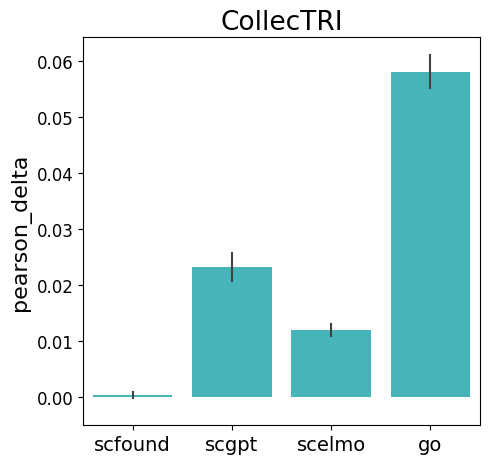

In [0]:
# Run bio-eval
base_dir = "/dbfs/mnt/sandbox/gema/scgpt_paper/barplots"
gene_set_name = 'CollecTRI'

df_results = bio_eval(
    corr_dict=all_correlation_dict,
    all_embeddings=filtered_embeddings,
    gene_sets=gene_sets, 
    gene_set_name = gene_set_name,
    common_genes=common_genes,
    chunk_size=4000, 
    base_dir=base_dir
)

In [0]:
import gc
gc.collect()

5017

## Heatmaps

In [0]:
%pip install fastcluster # makes clustermap more efficient

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
def plot_individual_clustermaps(corr_dict, gene_set_name=None, base_dir=None):
    """
    Plots and saves clustermaps for each embedding.
    """

    # Create an output directory if necessary
    output_dir = None
    if base_dir and gene_set_name:
        output_dir = os.path.join(base_dir, str(gene_set_name))
        os.makedirs(output_dir, exist_ok=True)
    
    plt.ioff()  

    for embedding_name, corr_df in corr_dict.items():
        # Create the clustermap
        cg = sns.clustermap(
            corr_df, 
            cmap="coolwarm", 
            center=0,
            cbar_kws={"label": "Correlation"},
            tree_kws={"linewidths": 0.},
            cbar_pos=(0, .2, .03, .4),
            figsize=(5, 5),
            yticklabels=False,
            xticklabels=False
        )
        cg.ax_heatmap.set_title(f"{embedding_name}", fontsize=15)
        
        # Save the figure
        if output_dir:
            filepath = os.path.join(output_dir, f"{embedding_name}_clustermap.png")
            cg.fig.savefig(filepath, dpi=300, bbox_inches='tight')
        
        # Show the figure
        plt.show()
        plt.close(cg.fig) 

INFO:distributed.core:Event loop was unresponsive in Nanny for 9.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts an

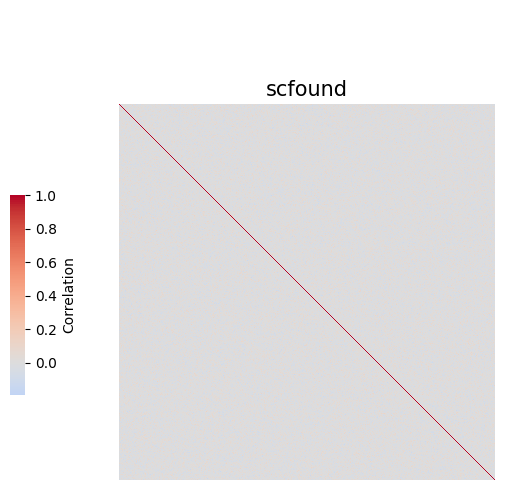

INFO:distributed.core:Event loop was unresponsive in Scheduler for 9.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

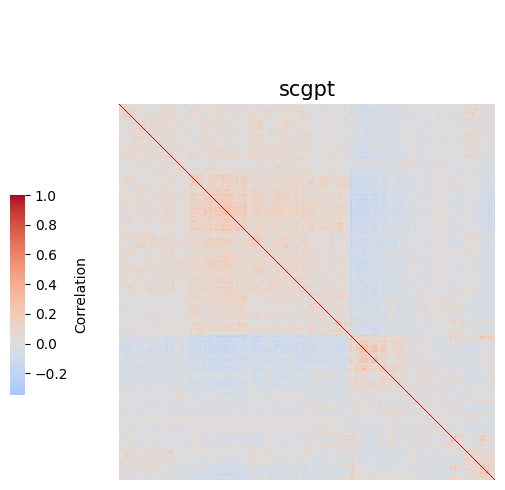

INFO:distributed.core:Event loop was unresponsive in Nanny for 9.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 9.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

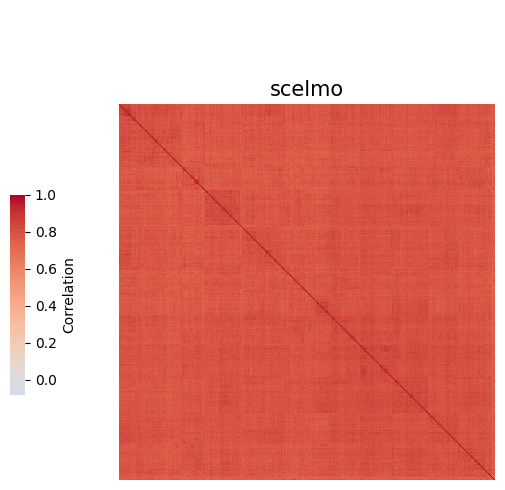

INFO:distributed.core:Event loop was unresponsive in Nanny for 9.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts an

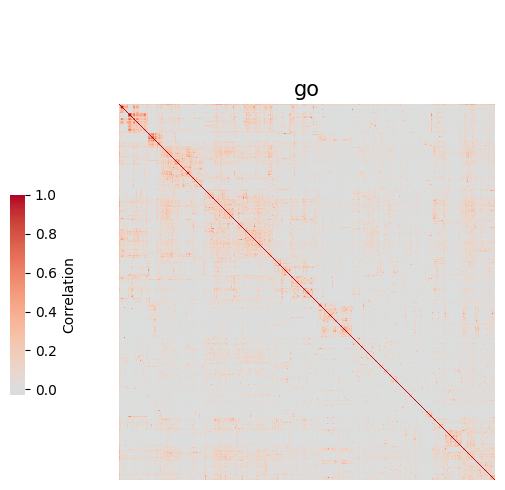

In [0]:
# Plot
base_dir = ...
gene_set_name = selected_db

plot_individual_clustermaps(
    corr_dict=all_correlation_dict,
    gene_set_name=gene_set_name,
    base_dir=base_dir
)